In [1]:
#pip install pandas

In [2]:
#pip install seaborn

In [3]:
#pip install scikit-learn

1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.

In [4]:
#SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
#MSSubClass: The building class
#MSZoning: The general zoning classification
#LotFrontage: Linear feet of street connected to property
#LotArea: Lot size in square feet
#Street: Type of road access
#Alley: Type of alley access
#LotShape: General shape of property
#LandContour: Flatness of the property
#Utilities: Type of utilities available
#LotConfig: Lot configuration
#LandSlope: Slope of property
#Neighborhood: Physical locations within Ames city limits
#Condition1: Proximity to main road or railroad
#Condition2: Proximity to main road or railroad (if a second is present)
#BldgType: Type of dwelling
#HouseStyle: Style of dwelling
#OverallQual: Overall material and finish quality
#OverallCond: Overall condition rating
#YearBuilt: Original construction date
#YearRemodAdd: Remodel date
#RoofStyle: Type of roof
#RoofMatl: Roof material
#Exterior1st: Exterior covering on house
#Exterior2nd: Exterior covering on house (if more than one material)
#MasVnrType: Masonry veneer type
#MasVnrArea: Masonry veneer area in square feet
#ExterQual: Exterior material quality
#ExterCond: Present condition of the material on the exterior
#Foundation: Type of foundation
#BsmtQual: Height of the basement
#BsmtCond: General condition of the basement
#BsmtExposure: Walkout or garden level basement walls
#BsmtFinType1: Quality of basement finished area
#BsmtFinSF1: Type 1 finished square feet
#BsmtFinType2: Quality of second finished area (if present)
#BsmtFinSF2: Type 2 finished square feet
#BsmtUnfSF: Unfinished square feet of basement area
#TotalBsmtSF: Total square feet of basement area
#Heating: Type of heating
#HeatingQC: Heating quality and condition
#CentralAir: Central air conditioning
#Electrical: Electrical system
#1stFlrSF: First Floor square feet
#2ndFlrSF: Second floor square feet
#LowQualFinSF: Low quality finished square feet (all floors)
#GrLivArea: Above grade (ground) living area square feet
#BsmtFullBath: Basement full bathrooms
#BsmtHalfBath: Basement half bathrooms
#FullBath: Full bathrooms above grade
#HalfBath: Half baths above grade
#Bedroom: Number of bedrooms above basement level
#Kitchen: Number of kitchens
#KitchenQual: Kitchen quality
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#Functional: Home functionality rating
#Fireplaces: Number of fireplaces
#FireplaceQu: Fireplace quality
#GarageType: Garage location
#GarageYrBlt: Year garage was built
#GarageFinish: Interior finish of the garage
#GarageCars: Size of garage in car capacity
#GarageArea: Size of garage in square feet
#GarageQual: Garage quality
#GarageCond: Garage condition
#PavedDrive: Paved driveway
#WoodDeckSF: Wood deck area in square feet
#OpenPorchSF: Open porch area in square feet
#EnclosedPorch: Enclosed porch area in square feet
#3SsnPorch: Three season porch area in square feet
#ScreenPorch: Screen porch area in square feet
#PoolArea: Pool area in square feet
#PoolQC: Pool quality
#Fence: Fence quality
#MiscFeature: Miscellaneous feature not covered in other categories
#MiscVal: $Value of miscellaneous feature
#MoSold: Month Sold
#YrSold: Year Sold
#SaleType: Type of sale
#SaleCondition: Condition of sale

2. Загрузите датасет в pandas DataFrame под названием df.

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


3. Выполните предварительную обработку данных, выполнив следующие шаги: a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). b. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
def count_null(kf):
    min_fill_rate = kf/100 
    
    # Считаем заполненность полей
    fill_rates = df.count() / len(df)
    fix = 0
    # Выводим поля с заполненностью меньше заданного числа
    for column, fill_rate in fill_rates.items():
        if fill_rate < min_fill_rate:
            fix +=1
            print(f"Поле '{column}' имеет заполненность {fill_rate*100:.2f}%")
    
    if fix == 0: print(f'Полей заполненых меньше чем {kf} % не найдено')    
count_null(50)

Поле 'Alley' имеет заполненность 6.23%
Поле 'MasVnrType' имеет заполненность 40.27%
Поле 'PoolQC' имеет заполненность 0.48%
Поле 'Fence' имеет заполненность 19.25%
Поле 'MiscFeature' имеет заполненность 3.70%


In [10]:
columns_to_display = ['Alley','MasVnrType','PoolQC','Fence','MiscFeature']

In [11]:
df[columns_to_display]

,Alley,MasVnrType,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,BrkFace,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,BrkFace,NaN,NaN,NaN
...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,NaN
1456,NaN,Stone,NaN,MnPrv,NaN
1457,NaN,NaN,NaN,GdPrv,Shed
1458,NaN,NaN,NaN,NaN,NaN


In [12]:
threshold = 0.5 * len(df)
df = df.dropna(axis=1, thresh=threshold) # Удаляем ненужные столбцы данные в которых заполнены на 50%

In [13]:
count_null(99)

Поле 'LotFrontage' имеет заполненность 82.26%
Поле 'BsmtQual' имеет заполненность 97.47%
Поле 'BsmtCond' имеет заполненность 97.47%
Поле 'BsmtExposure' имеет заполненность 97.40%
Поле 'BsmtFinType1' имеет заполненность 97.47%
Поле 'BsmtFinType2' имеет заполненность 97.40%
Поле 'FireplaceQu' имеет заполненность 52.74%
Поле 'GarageType' имеет заполненность 94.45%
Поле 'GarageYrBlt' имеет заполненность 94.45%
Поле 'GarageFinish' имеет заполненность 94.45%
Поле 'GarageQual' имеет заполненность 94.45%
Поле 'GarageCond' имеет заполненность 94.45%


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [15]:
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            mode_value = df[column].mode()[0]
            df.loc[df[column].isnull(), column] = mode_value
        else:
            median_value = df[column].median()
            df.loc[df[column].isnull(), column] = median_value

In [16]:
count_null(100)

Полей заполненых меньше чем 100 % не найдено


In [17]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [18]:
duplicates = df.duplicated()

In [19]:
num_duplicates = duplicates.sum()
print(f"Количество дубликатов: {num_duplicates}")

Количество дубликатов: 0


In [20]:
def check_data_compliance(df, max_errors_before_stats=10):
    """
    Проверяет соответствие данных в DataFrame типам столбцов и выдает рекомендации.

    Args:
        df: DataFrame для проверки.
        max_errors_before_stats: Максимальное количество ошибок до перехода к статистике.

    Returns:
        Словарь, содержащий рекомендации и статистику ошибок. Возвращает пустой словарь, если все в порядке.
    """

    recommendations = {}
    errors_count = {}

    for col in df.columns:
        dtype = df[col].dtype
        errors_count[col] = 0

        for i, val in df[col].items():
            if pd.isnull(val):
                continue

            if dtype == 'int64':
                if not isinstance(val, (int, np.integer)):
                    errors_count[col] += 1
                    if errors_count[col] <= max_errors_before_stats:
                        recommendations.setdefault(col, []).append(f"Запись {i+1}: значение '{val}' не является целым числом.")
            elif dtype == 'float64':
                if not isinstance(val, (int, float, np.integer, np.floating)):
                    errors_count[col] += 1
                    if errors_count[col] <= max_errors_before_stats:
                        recommendations.setdefault(col, []).append(f"Запись {i+1}: значение '{val}' не является числом.")
            elif dtype == 'object':
                try:
                    float(val)
                    errors_count[col] += 1
                    if errors_count[col] <= max_errors_before_stats:
                        recommendations.setdefault(col, []).append(f"Запись {i+1}: значение '{val}' является числом, рекомендуется изменить тип столбца.")
                except ValueError:
                    pass


    # Статистика ошибок
    for col, count in errors_count.items():
        if count > max_errors_before_stats:
            recommendations[col] = f"В столбце '{col}' обнаружено {count} ошибок. Рекомендуется провести анализ данных и, при необходимости, изменить тип столбца."

    # Удаляем столбцы без ошибок
    recommendations = {k: v for k, v in recommendations.items() if v}


    return recommendations



result = check_data_compliance(df)

if result:
    for col, recs in result.items():
        print(f"Столбец '{col}':")
        if isinstance(recs, list):
            for rec in recs:
                print(f"- {rec}")
        else:
            print(f"- {recs}")
        print("-" * 20)
else:
    print("Все столбцы имеют корректные значения согласно их типам.")

Все столбцы имеют корректные значения согласно их типам.


4. разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

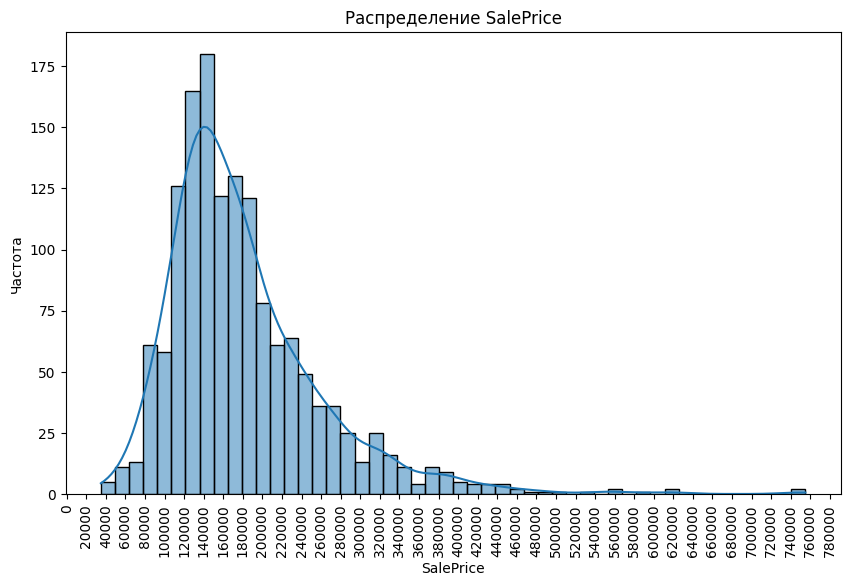

In [22]:
# a. Распределение целевой переменной 'SalePrice' и выбросы
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.histplot(df['SalePrice'], bins=50, kde=True)
plt.title('Распределение SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.locator_params(axis='x', nbins=40)
plt.show()

In [23]:
# По графику видно, что наибольшее количество вхождений стоимости находится в районе 120000 - 150000 $

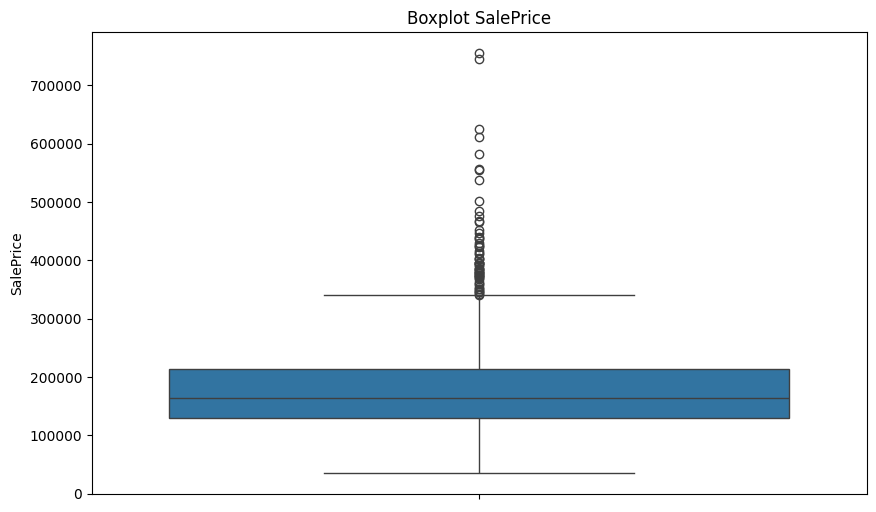

In [24]:
# Поиск выбросов с помощью boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['SalePrice'])
plt.title('Boxplot SalePrice')
plt.show()

In [25]:
#Более точный анализ выбросов с помощью IQR
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Выбросы SalePrice (IQR): ниже {lower_bound}, выше {upper_bound}")
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]['SalePrice']
print(f"Количество выбросов SalePrice (IQR): {len(outliers)}")

Выбросы SalePrice (IQR): ниже 3937.5, выше 340037.5
Количество выбросов SalePrice (IQR): 61


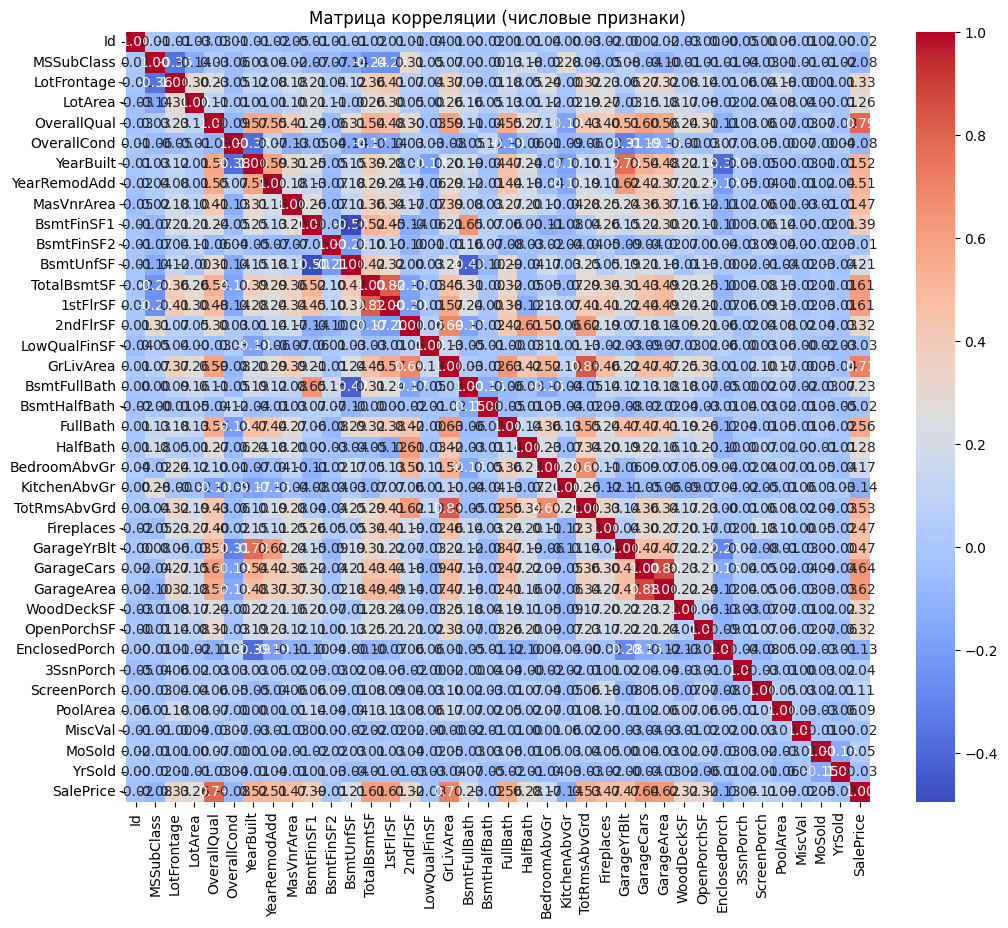

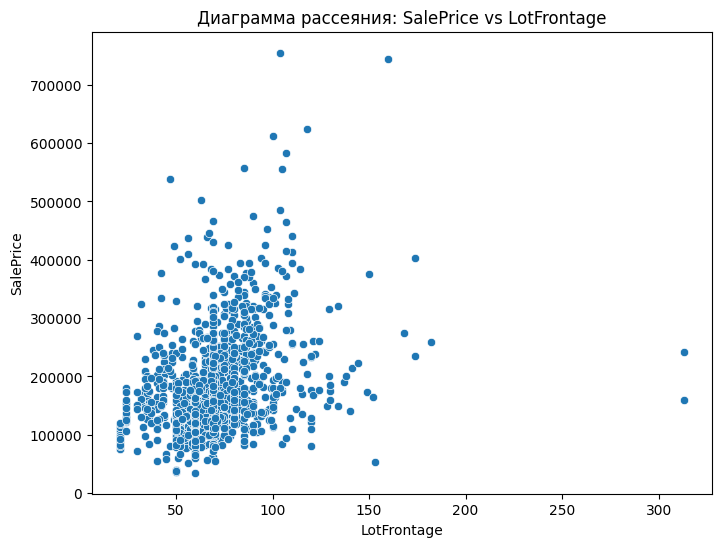

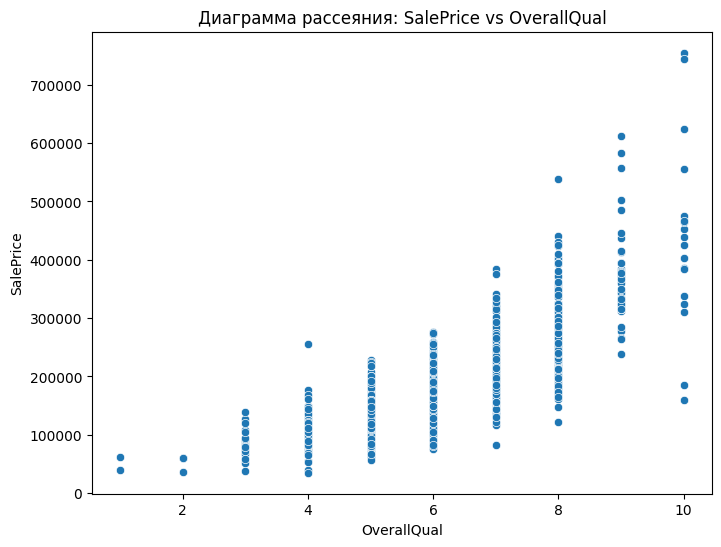

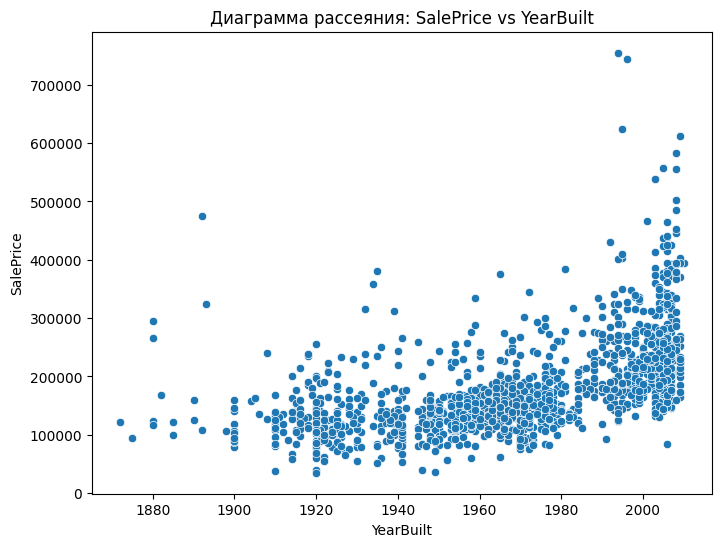

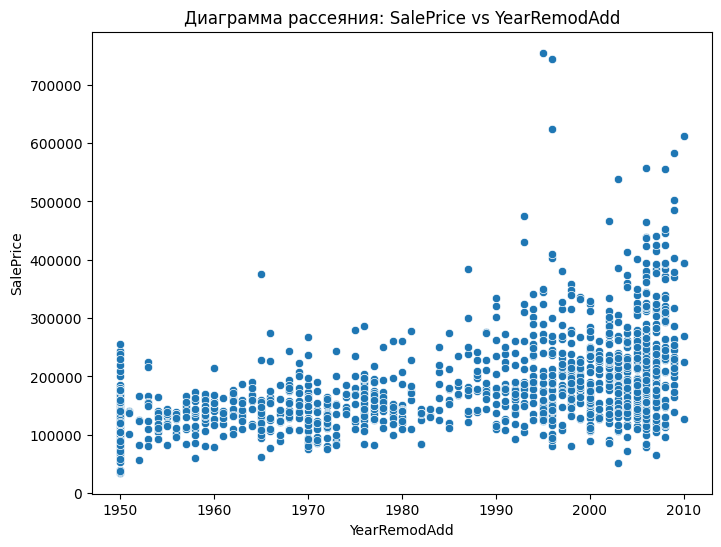

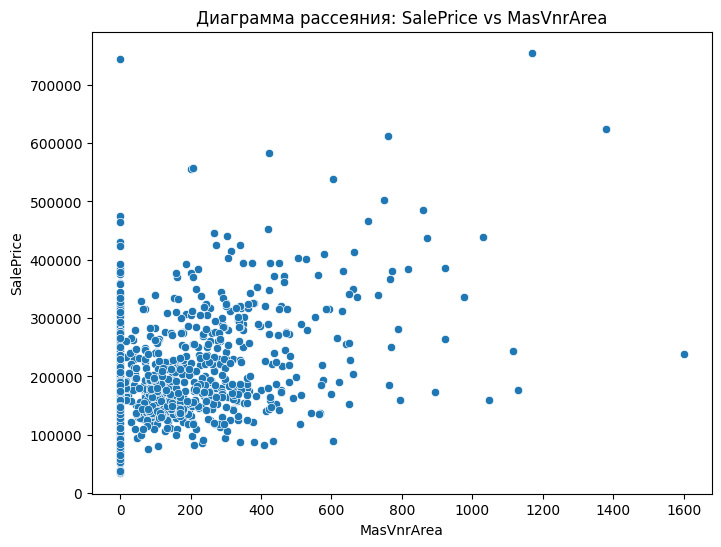

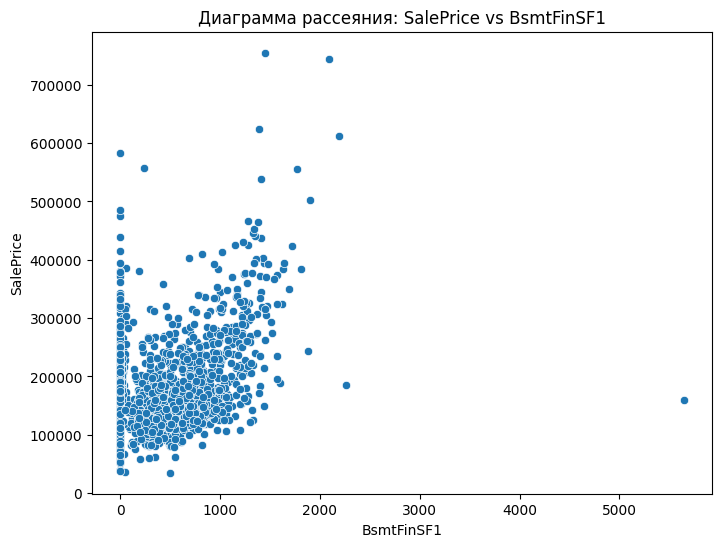

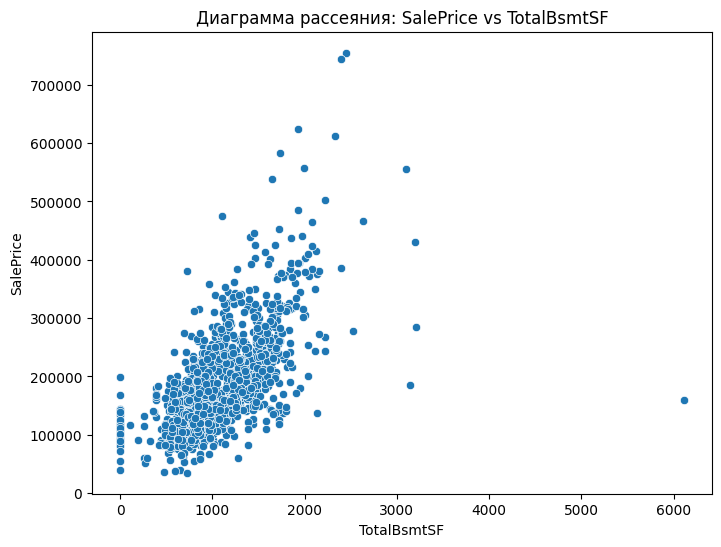

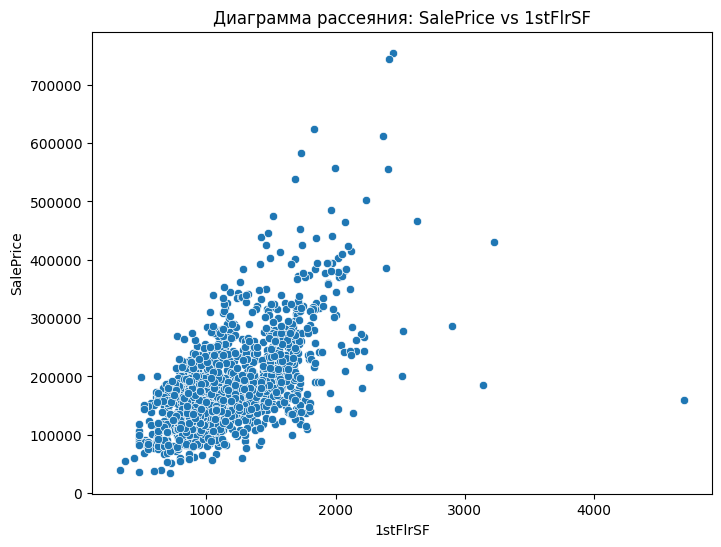

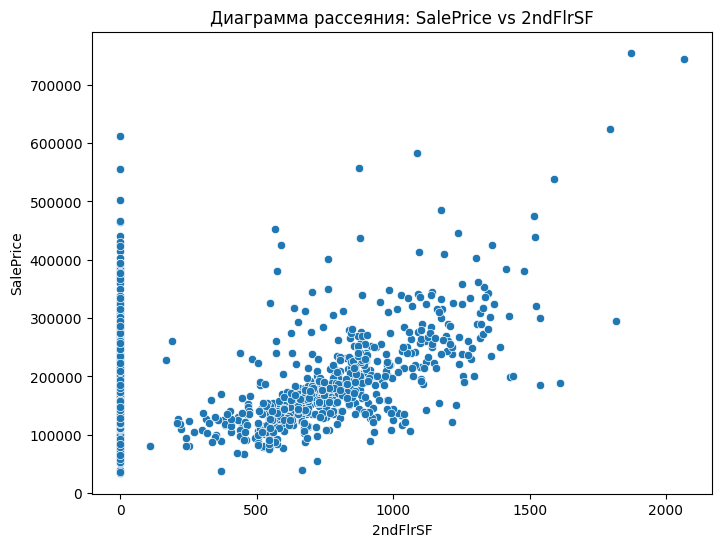

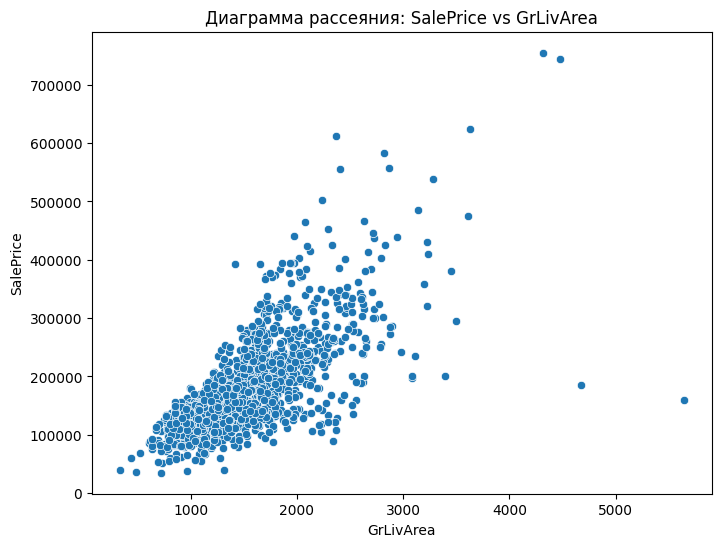

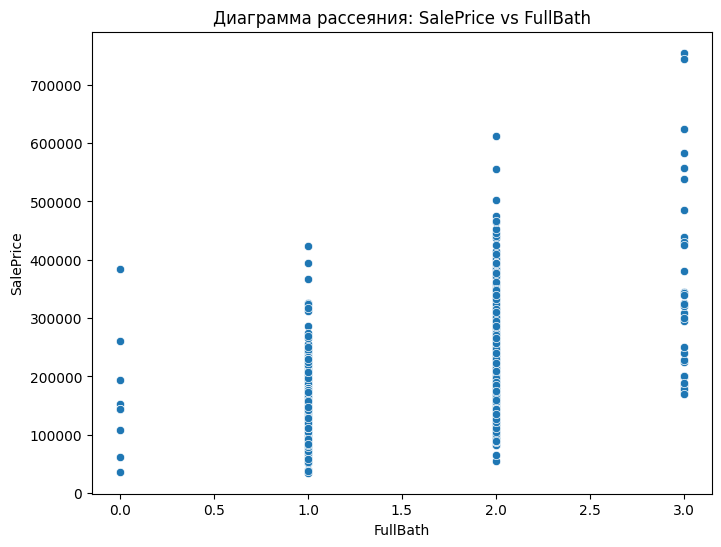

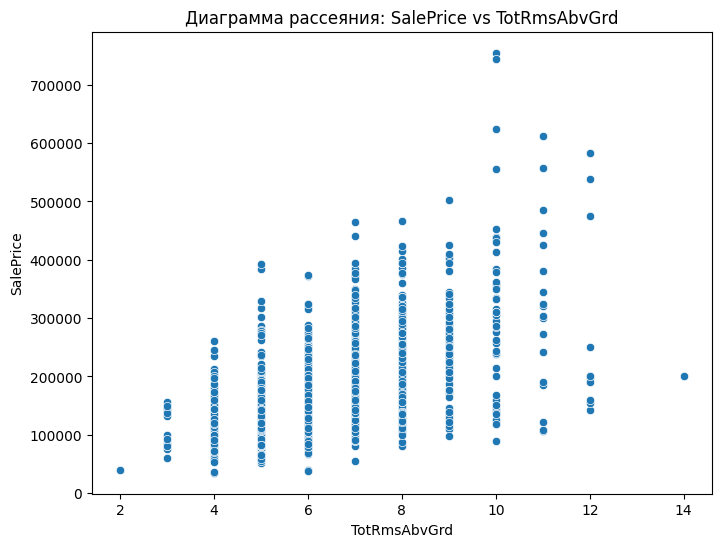

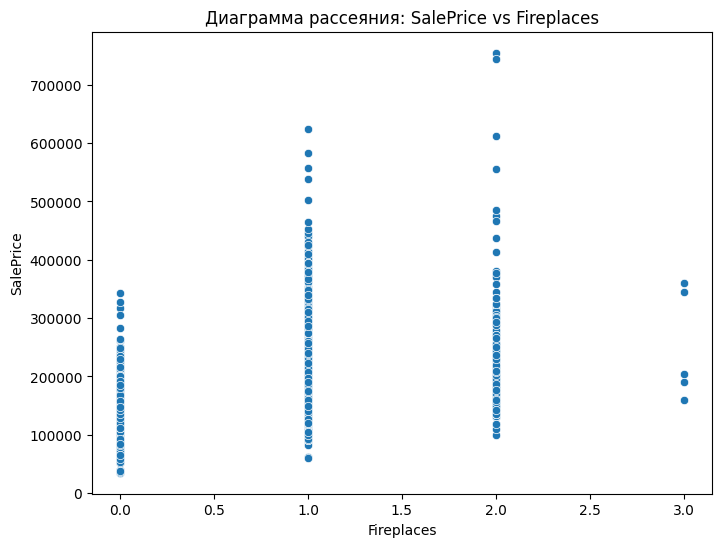

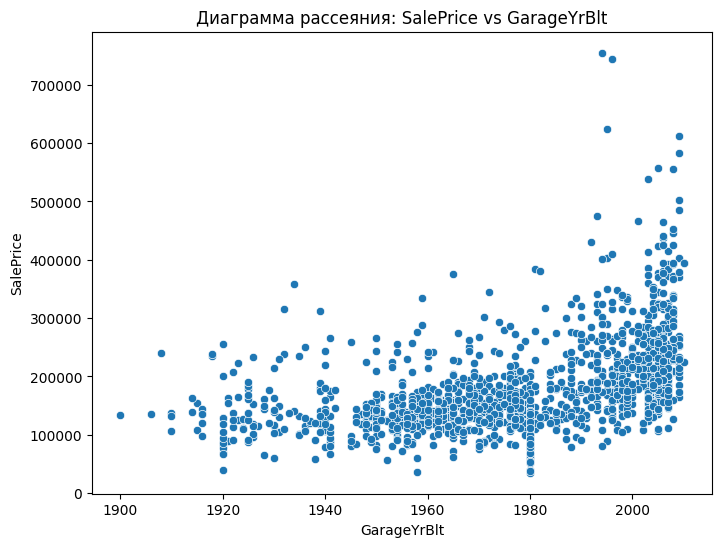

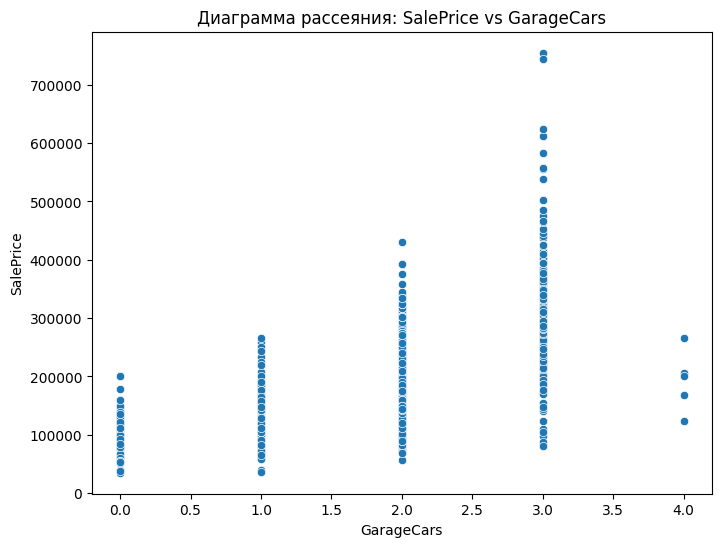

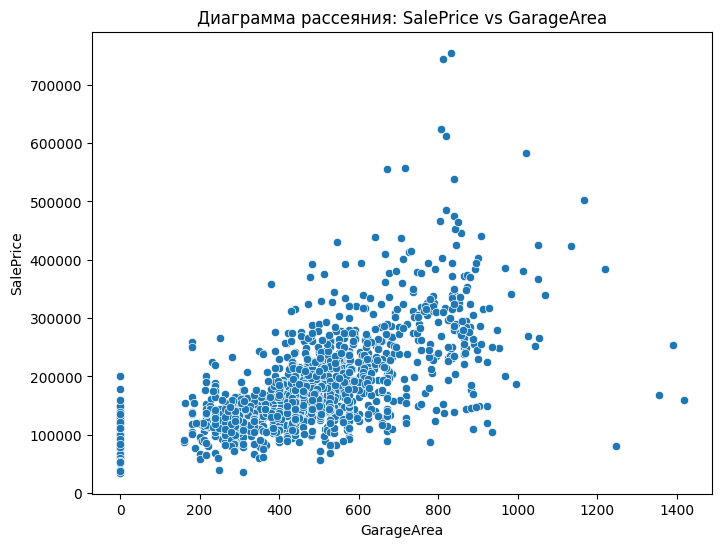

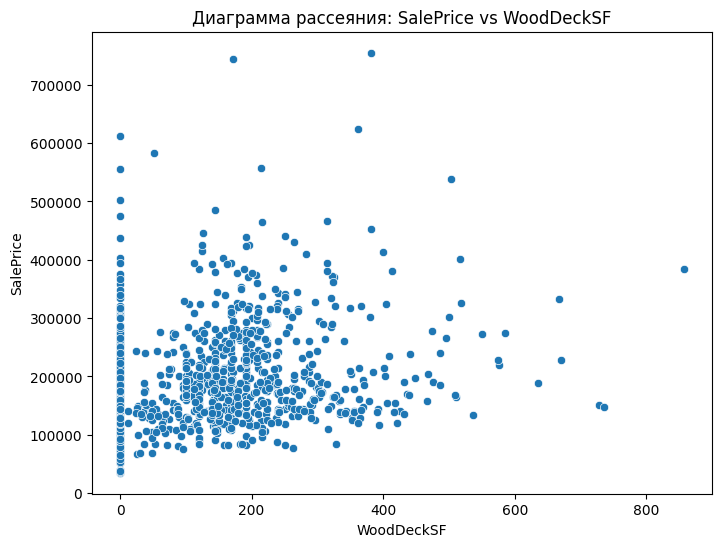

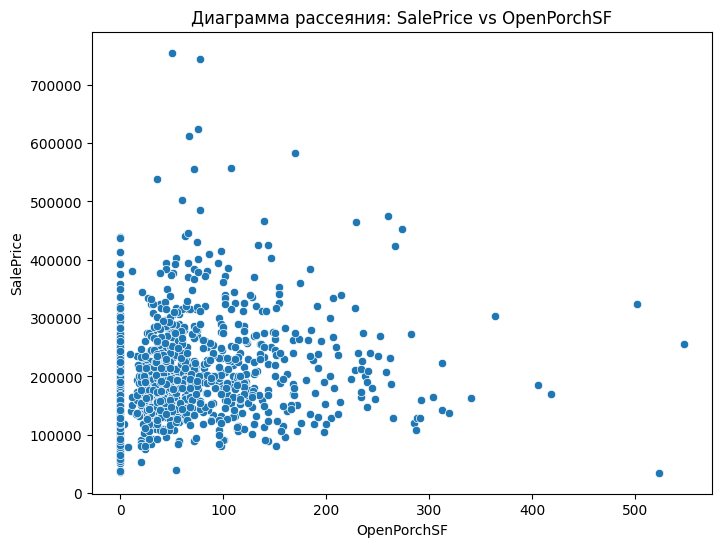

In [26]:
# b. Взаимосвязи между целевой переменной и другими характеристиками

# Матрица корреляции только для числовых столбцов
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции (числовые признаки)')
plt.show()


# Диаграммы рассеяния только для числовых столбцов с корреляцией выше порога
correlation_with_saleprice = correlation_matrix['SalePrice'].drop('SalePrice').abs()
threshold = 0.3 # Устанавливаем порог корреляции
strong_correlations = correlation_with_saleprice[correlation_with_saleprice > threshold]

for feature in strong_correlations.index:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='SalePrice', data=df)
    plt.title(f'Диаграмма рассеяния: SalePrice vs {feature}')
    plt.show()

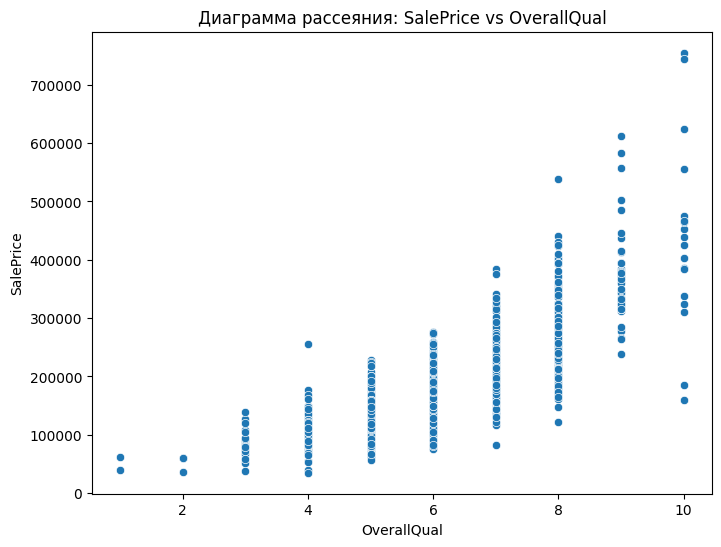

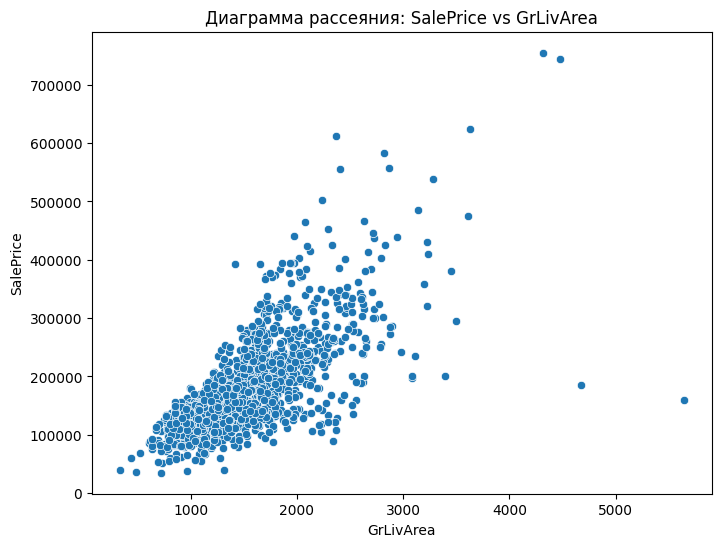

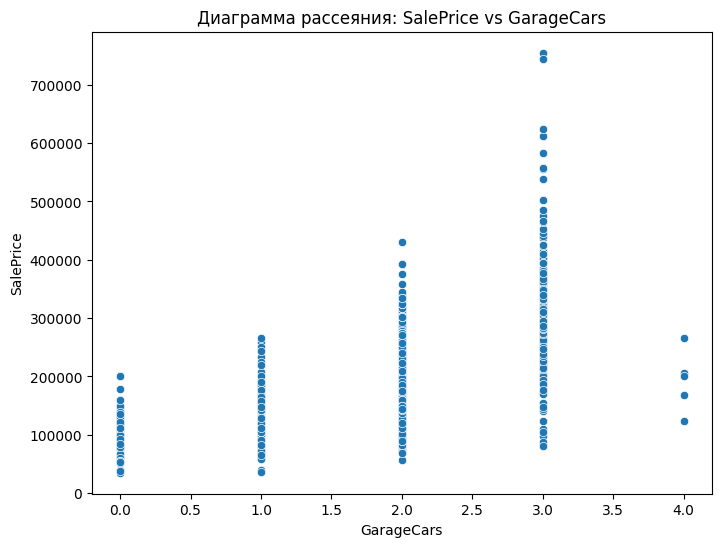

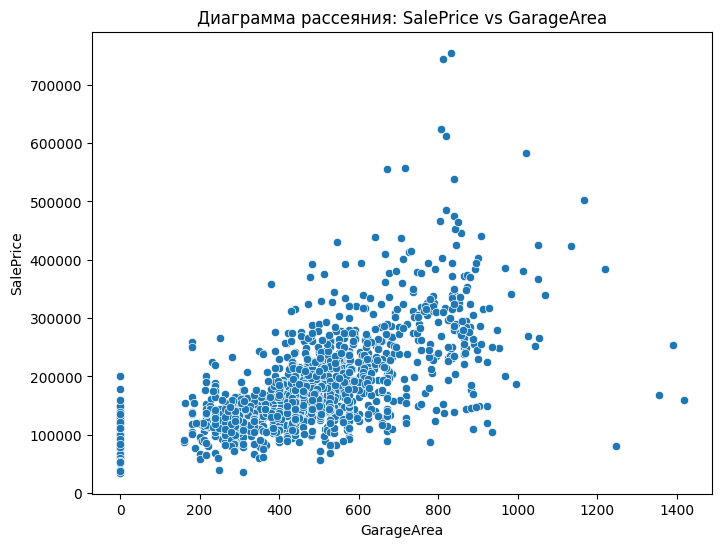

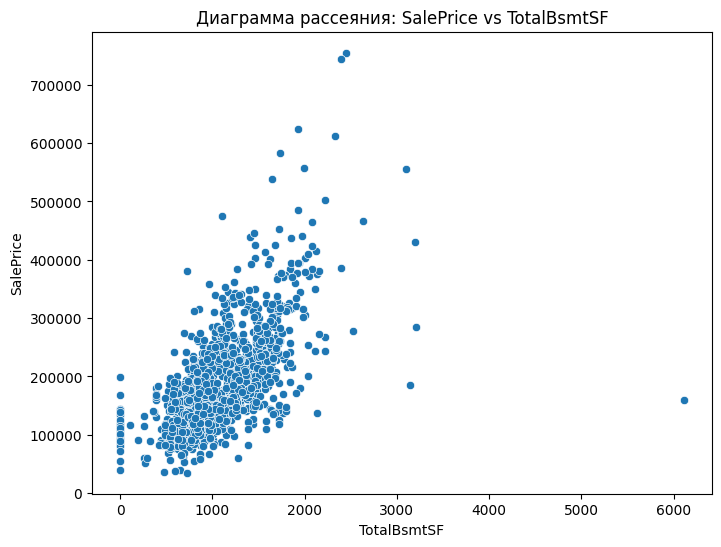

In [27]:

# Диаграммы рассеяния для сильных корреляций (выберем топ-5 по абсолютной величине корреляции с SalePrice, исключая SalePrice)
top_correlations = correlation_matrix['SalePrice'].drop('SalePrice').abs().sort_values(ascending=False).head(5)
for feature in top_correlations.index:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='SalePrice', data=df)
    plt.title(f'Диаграмма рассеяния: SalePrice vs {feature}')
    plt.show()

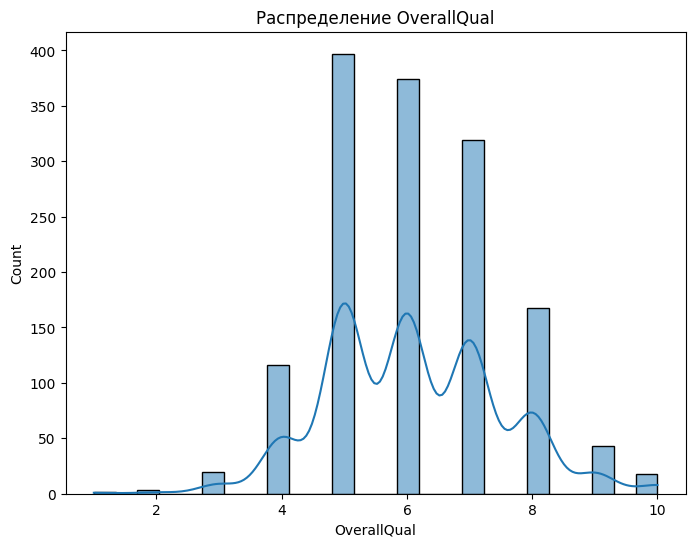

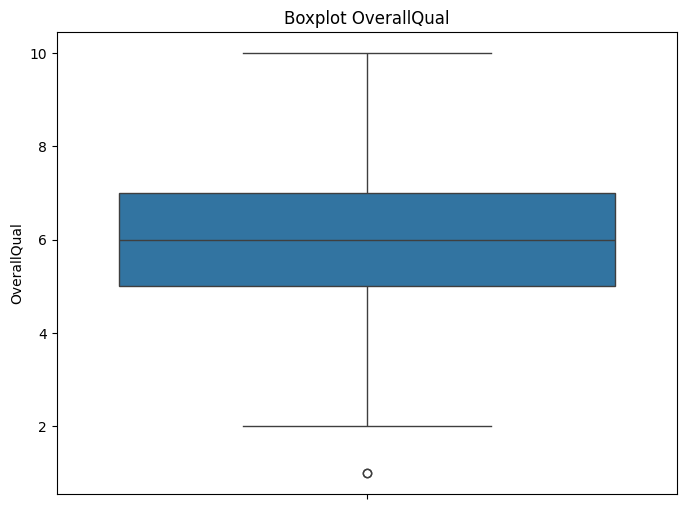

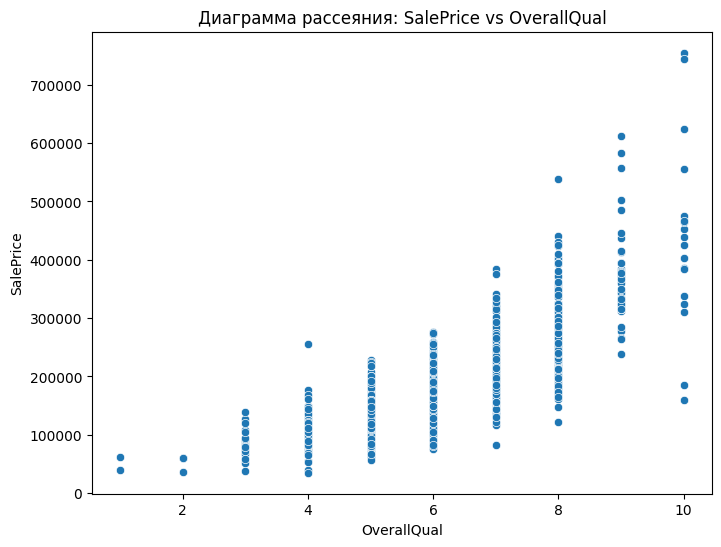

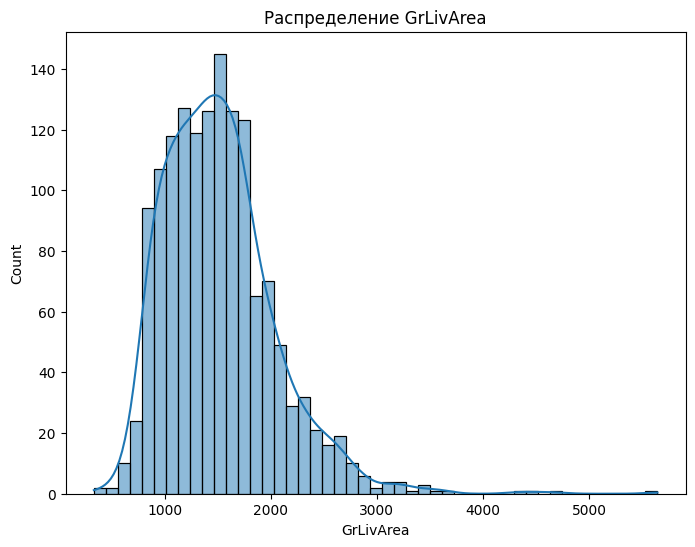

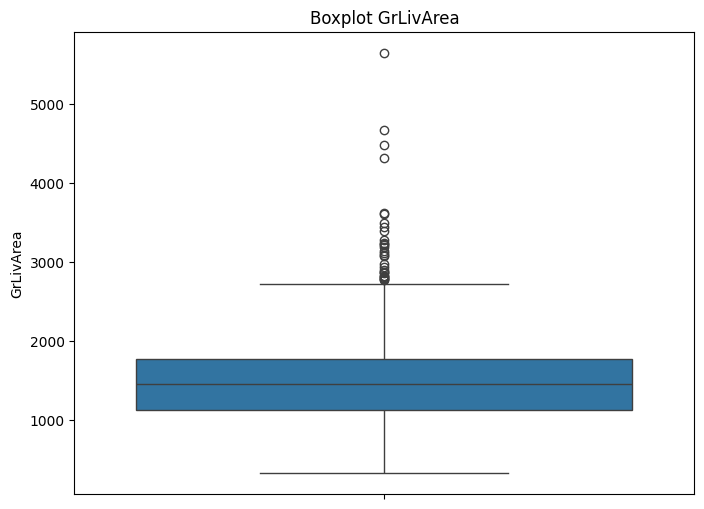

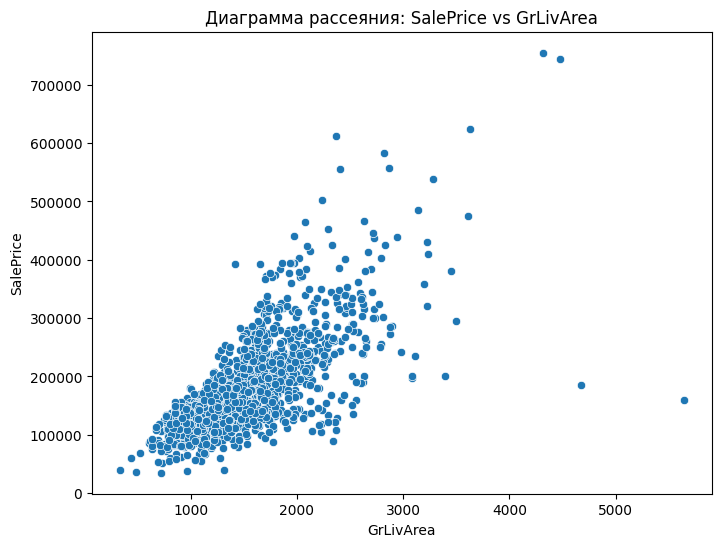

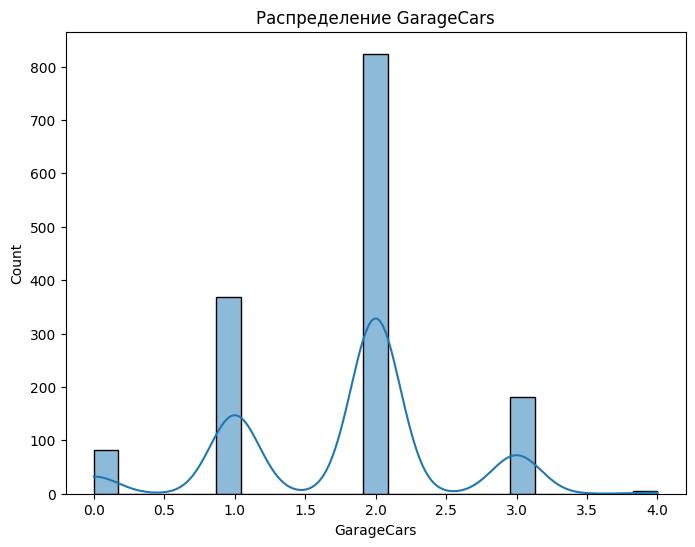

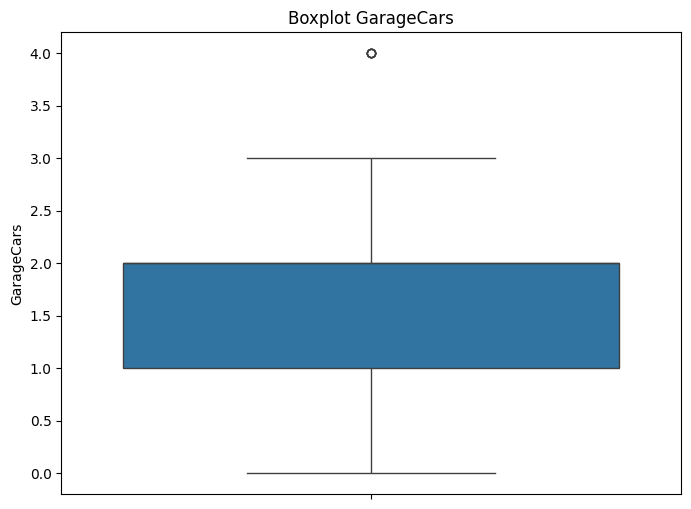

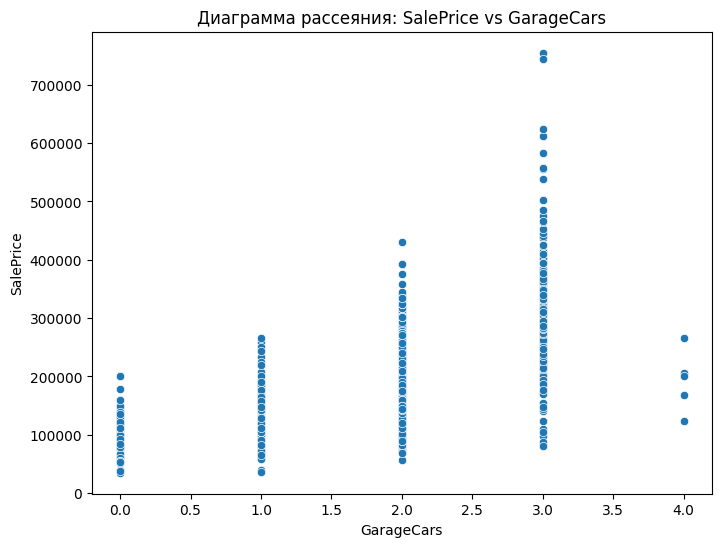

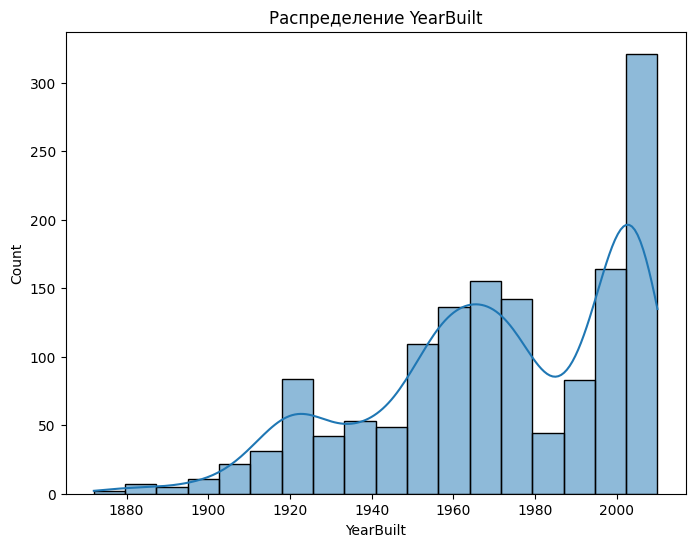

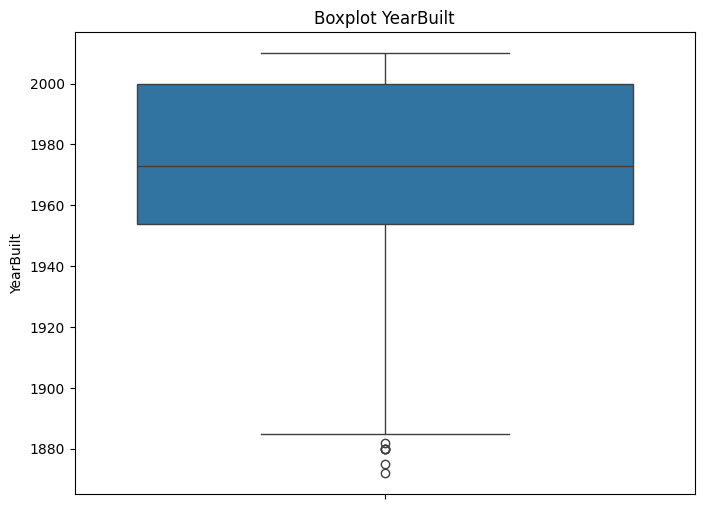

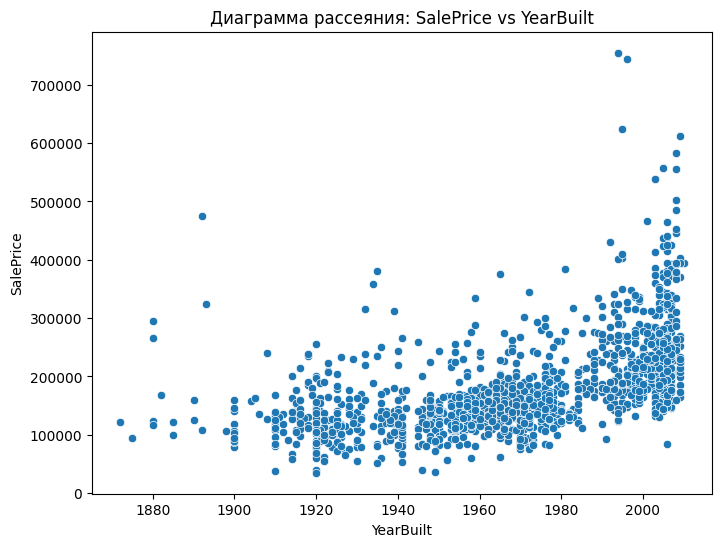

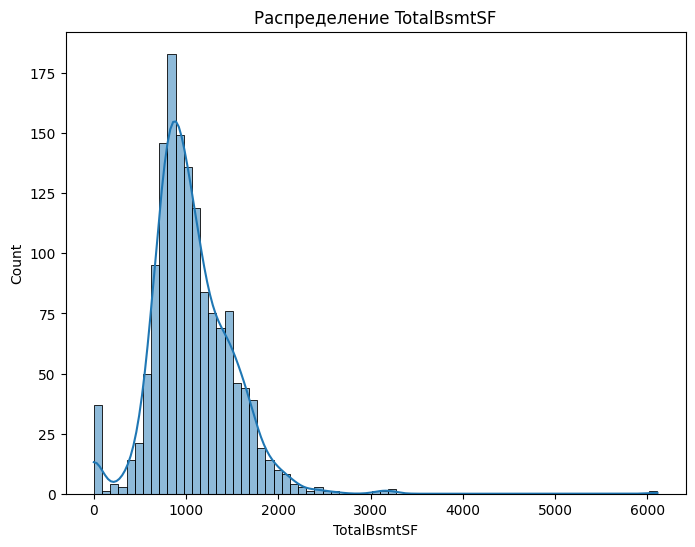

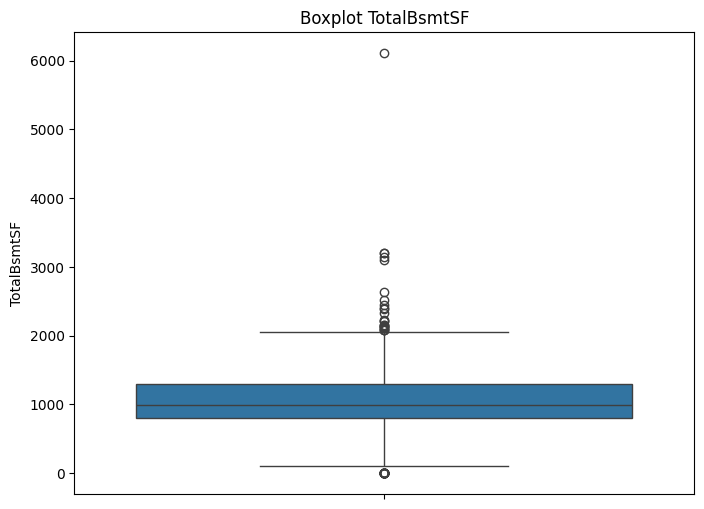

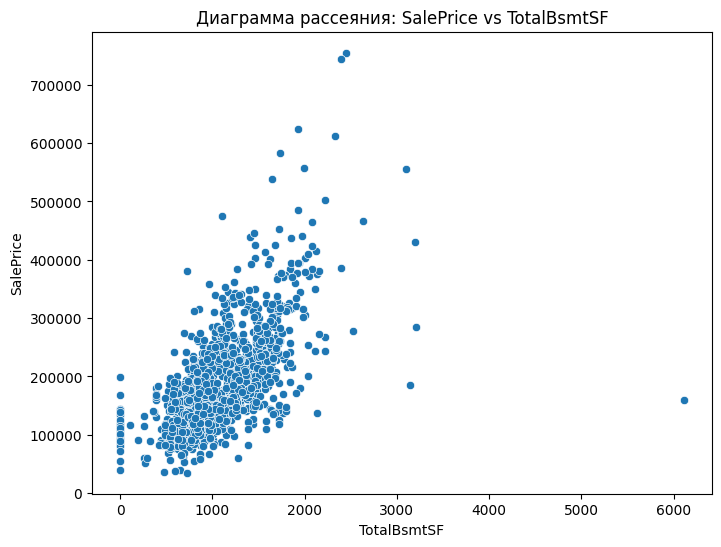

In [28]:
# c. Распределение и взаимосвязи других важных характеристик

important_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF']

for feature in important_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Распределение {feature}')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot {feature}')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='SalePrice', data=df)
    plt.title(f'Диаграмма рассеяния: SalePrice vs {feature}')
    plt.show()

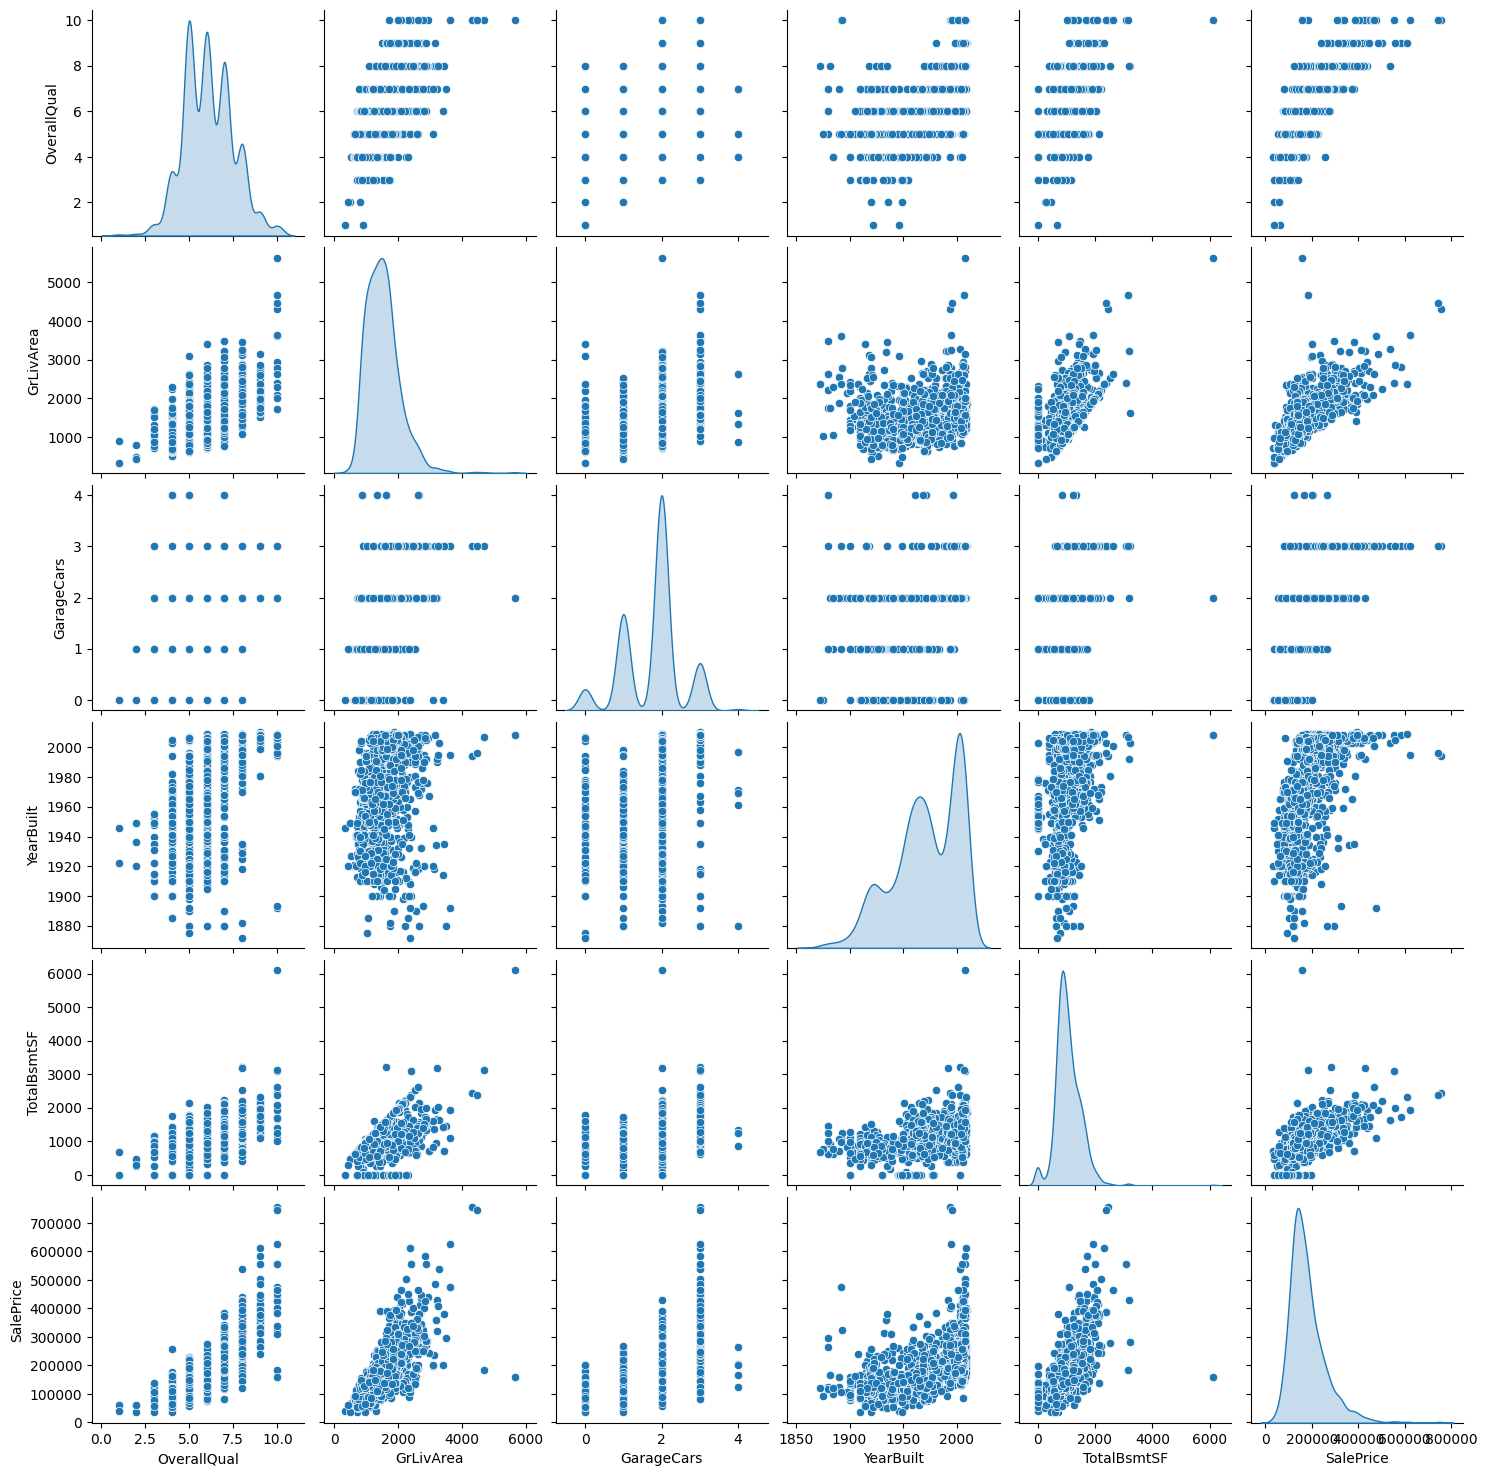

In [29]:
# d. Дополнительные визуализации (примеры)

# Pairplot для нескольких важных признаков
sns.pairplot(df[important_features + ['SalePrice']], diag_kind='kde')
plt.show()

5. Выполните проектирование признаков путем реализации следующих преобразований:
   a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной.
   b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [31]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [33]:
# a. Преобразование категориальных переменных
categorical_cols = df.select_dtypes(include=['object']).columns
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
le = LabelEncoder()

for col in categorical_cols:
    if df[col].nunique() <= 10:
        encoded_data = ohe.fit_transform(df[[col]])
        encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out([col]))
        df = pd.concat([df.drop(columns=[col]), encoded_df], axis=1)
    else:
        df[col] = le.fit_transform(df[col])

#### Здесь используем OneHotEncoder для категориальных признаков с небольшим количеством уникальных значений (менее 10). handle_unknown='ignore' обрабатывает неизвестные значения во время предсказания, sparse_output=False возвращает результат в виде массива NumPy, который легко преобразовать в DataFrame.
#### Для категориальных признаков с большим количеством уникальных значений (более 10) используется LabelEncoder.
#### Исходные столбцы, использованные для создания новых, удаляются - это необязательный шаг, но может помочь предотвратить мультиколлинеарность.

In [34]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,5,7,5,2003,2003,12,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,24,6,8,1976,1976,8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,5,7,5,2001,2002,12,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,6,7,5,1915,1970,13,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,15,8,5,2000,2000,12,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
print(df.dtypes)

Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
Neighborhood               int64
                          ...   
SaleCondition_AdjLand    float64
SaleCondition_Alloca     float64
SaleCondition_Family     float64
SaleCondition_Normal     float64
SaleCondition_Partial    float64
Length: 220, dtype: object


In [36]:
# b. Создание новых признаков на основе имеющихся числовых признаков

# Общая площадь над землей (с учетом низкокачественных площадей):
df['TotalLivArea'] = df['GrLivArea'] + df['LowQualFinSF']

# Общая площадь всех ванных комнат:
df['TotalBathrooms'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']

# Общая площадь крыльца:
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

# Общее количество автомобилей в гараже и на улице (если есть информация о парковке на улице):
# (В вашем наборе данных нет информации о парковке на улице, поэтому используется только GarageCars)
df['TotalGarageCars'] = df['GarageCars'] #Если будет информация о парковке на улице, здесь нужно будет ее добавить


# Возраст дома с учетом ремонта:
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodeledAge'] = df['YrSold'] - df['YearRemodAdd']



In [37]:
df[['TotalLivArea', 'TotalBathrooms', 'TotalPorchSF', 'TotalGarageCars', 'HouseAge', 'RemodeledAge']].head()

,TotalLivArea,TotalBathrooms,TotalPorchSF,TotalGarageCars,HouseAge,RemodeledAge
0,1710,4,61,2,5,5
1,1262,3,0,2,31,31
2,1786,4,42,2,7,6
3,1717,2,307,3,91,36
4,2198,4,84,3,8,8


#### После применения этих преобразований ваш DataFrame будет содержать новые числовые признаки, что улучшит качество моделей машинного обучения.

In [38]:
# 6. Сохранение DataFrame в CSV-файл
df.to_csv('cleaned_house_prices.csv', index=False) 

print("Данные успешно сохранены в файл cleaned_house_prices.csv")

Данные успешно сохранены в файл cleaned_house_prices.csv
